In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
import statistics

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [2]:
stud = pd.read_csv('stud_math.csv')

In [150]:
display(stud.head())
stud.info()

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,-6.0,yes,None,no,4,3,4,3,6.0,30.0
1,GP,F,17,U,GT3,NaN,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,-6.0,yes,yes,no,5,3,3,3,4.0,30.0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,None,no,yes,-6.0,yes,yes,None,4,3,2,3,10.0,50.0
3,GP,F,15,U,GT3,T,4,2,health,None,home,mother,1,3,0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3,2,2,5,2.0,75.0
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,-6.0,yes,no,no,4,3,2,5,4.0,50.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              361 non-null    object 
 1   sex                 361 non-null    object 
 2   age                 361 non-null    object 
 3   address             347 non-null    object 
 4   famsize             339 non-null    object 
 5   p_status            323 non-null    object 
 6   m_edu               358 non-null    object 
 7   f_edu               338 non-null    object 
 8   m_job               345 non-null    object 
 9   f_job               327 non-null    object 
 10  reason              344 non-null    object 
 11  guardian            331 non-null    object 
 12  traveltime          333 non-null    object 
 13  studytime           356 non-null    object 
 14  failures            342 non-null    object 
 15  schoolsup           352 non-null    object 
 16  famsup  

In [4]:
stud.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'studytime, granular', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'health', 'absences', 'score'],
      dtype='object')

In [5]:
stud.columns = ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
                'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
                'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                'studytime_granular', 'higher', 'internet', 'romantic', 'famrel',
                'freetime', 'goout', 'health', 'absences', 'score']

In [6]:
stud.head()

,school,sex,age,address,famsize,p_status,m_edu,f_edu,m_job,f_job,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


#### school

In [7]:
display(pd.DataFrame(stud.school.value_counts()))
stud.loc[:, ['school']].info()

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Текстовый столбец, пропущенных значений нет.

#### sex

In [8]:
display(pd.DataFrame(stud.sex.value_counts()))
stud.loc[:, ['sex']].info()

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


Текстовый столбец, пропущенных значений нет.

#### age

In [9]:
display(pd.DataFrame(stud.age.value_counts()))
stud.loc[:, ['age']].info()

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


Столбец числовой, пропусков нет. Возраст выборки соответствует описанию (15-22 года). Переменная номинативная, поэтому эти числа использовать не будем, можно сразу сделать столбец текстовым, чтобы он не участвовал в корреляционном анализе.

In [10]:
stud.age = stud.age.astype(str)

#### address

In [11]:
display(pd.DataFrame(stud.address.value_counts()))
stud.loc[:, ['address']].info()

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [12]:
print(f'Текстовый столбец, {395-378} пропущенных значений.')

Текстовый столбец, 17 пропущенных значений.


#### famsize

In [13]:
display(pd.DataFrame(stud.famsize.value_counts()))
stud.loc[:, ['famsize']].info()

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [14]:
print(f'Текстовый столбец, {395-368} пропущенных значений.')

Текстовый столбец, 27 пропущенных значений.


#### p_status

In [15]:
display(pd.DataFrame(stud.p_status.value_counts()))
stud.loc[:, ['p_status']].info()

,p_status
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   p_status  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [16]:
print(f'Текстовый столбец, {395-350} пропущенных значений.')

Текстовый столбец, 45 пропущенных значений.


#### m_edu

In [17]:
display(pd.DataFrame(stud.m_edu.value_counts()))
stud.loc[:, ['m_edu']].info()
stud.m_edu.unique()

,m_edu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   m_edu   392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 4.,  1.,  3.,  2., nan,  0.])

In [18]:
print(f'Столбец числовой, {395-392} пропущенных значения. Обозначения соответствуют условиям (от 0 до 4). Переменная номинативная, поэтому эти числа использовать не будем, можно сразу сделать столбец текстовым, чтобы он не участвовал в корреляционном анализе.')

Столбец числовой, 3 пропущенных значения. Обозначения соответствуют условиям (от 0 до 4). Переменная номинативная, поэтому эти числа использовать не будем, можно сразу сделать столбец текстовым, чтобы он не участвовал в корреляционном анализе.


Заменим nan на None

In [19]:
stud.m_edu = stud.m_edu.astype(str)

In [20]:
stud.m_edu = stud.m_edu.apply(lambda x: None if x == 'nan' else x[:-2])

In [21]:
display(pd.DataFrame(stud.m_edu.value_counts()))
stud.loc[:, ['m_edu']].info()
stud.m_edu.unique()

,m_edu
4,131
2,102
3,97
1,59
0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_edu   392 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['4', '1', '3', '2', None, '0'], dtype=object)

#### f_edu

In [22]:
display(pd.DataFrame(stud.f_edu.value_counts()))
stud.loc[:, ['f_edu']].info()
stud.f_edu.unique()

,f_edu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_edu   371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 4.,  1.,  2.,  3., 40., nan,  0.])

In [23]:
print(f'Столбец числовой, {395-371} пропущенных значения. Среди данных есть 40.0, что скорее всего является опечаткой — по условию значения от 0 до 4. Переменная номинативная, поэтому эти числа использовать не будем. Заменим 40.0 на 4. Можно сразу сделать столбец текстовым, чтобы он не участвовал в корреляционном анализе.')

Столбец числовой, 24 пропущенных значения. Среди данных есть 40.0, что скорее всего является опечаткой — по условию значения от 0 до 4. Переменная номинативная, поэтому эти числа использовать не будем. Заменим 40.0 на 4. Можно сразу сделать столбец текстовым, чтобы он не участвовал в корреляционном анализе.


Заменим nan на None, а 40 на 4.

In [24]:
stud.f_edu = stud.f_edu.astype(str)

In [25]:
stud.f_edu = stud.f_edu.apply(lambda x: None if x == 'nan' else x[:-2])

In [26]:
stud.f_edu = stud.f_edu.replace('40', '4')

#### m_job

In [27]:
display(pd.DataFrame(stud.m_job.value_counts()))
stud.loc[:, ['m_job']].info()
stud.m_job.unique()

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

In [28]:
print(f'Текстовый столбец, пропущенных значений: {395-376}.')

Текстовый столбец, пропущенных значений: 19.


In [29]:
stud.m_job = stud.m_job.astype(str)

In [30]:
stud.m_job = stud.m_job.apply(lambda x: None if x == 'nan' else x)

In [31]:
display(pd.DataFrame(stud.m_job.value_counts()))
stud.loc[:, ['m_job']].info()
stud.m_job.unique()

,m_job
other,133
services,98
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   m_job   376 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['at_home', 'health', 'other', 'services', 'teacher', None],
      dtype=object)

#### f_job

In [32]:
display(pd.DataFrame(stud.f_job.value_counts()))
stud.loc[:, ['f_job']].info()
stud.f_job.unique()

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

In [33]:
print(f'Текстовый столбец, пропущенных значений: {395-359}.')

Текстовый столбец, пропущенных значений: 36.


In [34]:
stud.f_job = stud.f_job.astype(str)

In [35]:
stud.f_job = stud.f_job.apply(lambda x: None if x == 'nan' else x)

In [36]:
display(pd.DataFrame(stud.f_job.value_counts()))
stud.loc[:, ['f_job']].info()
stud.f_job.unique()

,f_job
other,197
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f_job   359 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['teacher', 'other', None, 'health', 'services', 'at_home'],
      dtype=object)

#### reason

In [37]:
display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()
stud.reason.unique()

,reason
course,137
home,104
reputation,103
other,34


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['course', 'other', 'home', 'reputation', nan], dtype=object)

In [38]:
print(f'Текстовый столбец, пропущенных значений: {395-378}.')

Текстовый столбец, пропущенных значений: 17.


In [39]:
stud.reason = stud.reason.astype(str)
stud.reason = stud.reason.apply(lambda x: None if x == 'nan' else x)

#### guardian

In [40]:
display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()
stud.guardian.unique()

,guardian
mother,250
father,86
other,28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['mother', 'father', 'other', nan], dtype=object)

In [41]:
print(f'Текстовый столбец, пропущенных значений: {395-364}.')

Текстовый столбец, пропущенных значений: 31.


In [42]:
stud.guardian = stud.guardian.astype(str)
stud.guardian = stud.guardian.apply(lambda x: None if x == 'nan' else x)

#### traveltime

In [43]:
display(pd.DataFrame(stud.traveltime.value_counts()))
stud.loc[:, ['traveltime']].info()
stud.traveltime.unique()

,traveltime
1.0,242
2.0,96
3.0,22
4.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  367 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 2.,  1.,  3., nan,  4.])

In [44]:
print(f'Числовой столбец, пропущенных значений {395-367}. Номинативная переменная, сделаем столбец текстовым.')

Числовой столбец, пропущенных значений 28. Номинативная переменная, сделаем столбец текстовым.


In [45]:
stud.traveltime = stud.traveltime.astype(str)
stud.traveltime = stud.traveltime.apply(lambda x: None if x == 'nan' else x[:-2])

#### studytime

In [46]:
display(pd.DataFrame(stud.studytime.value_counts()))
stud.loc[:, ['studytime']].info()
stud.studytime.unique()

,studytime
2.0,194
1.0,103
3.0,64
4.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 2.,  3.,  1., nan,  4.])

In [47]:
print(f'Числовой столбец, пропущенных значений {395-388}. Номинативная переменная, сделаем столбец текстовым.')

Числовой столбец, пропущенных значений 7. Номинативная переменная, сделаем столбец текстовым.


In [48]:
stud.studytime = stud.studytime.astype(str)
stud.studytime = stud.studytime.apply(lambda x: None if x == 'nan' else x[:-2])

#### failures

In [49]:
display(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()
stud.failures.unique()

,failures
0.0,293
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  373 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 0.,  3., nan,  2.,  1.])

In [50]:
print(f'Числовой столбец, пропущенных значений {395-373}. Номинативная переменная, сделаем столбец текстовым.')

Числовой столбец, пропущенных значений 22. Номинативная переменная, сделаем столбец текстовым.


In [51]:
stud.failures = stud.failures.astype(str)
stud.failures = stud.failures.apply(lambda x: None if x == 'nan' else x[:-2])

#### schoolsup

In [52]:
display(pd.DataFrame(stud.schoolsup.value_counts()))
stud.loc[:, ['schoolsup']].info()
stud.schoolsup.unique()

,schoolsup
no,335
yes,51


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  386 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['yes', 'no', nan], dtype=object)

In [53]:
print(f'Текстовый столбец, пропущенных значений: {395-386}.')

Текстовый столбец, пропущенных значений: 9.


In [54]:
stud.schoolsup = stud.schoolsup.astype(str)
stud.schoolsup = stud.schoolsup.apply(lambda x: None if x == 'nan' else x)

#### famsup

In [55]:
display(pd.DataFrame(stud.famsup.value_counts()))
stud.loc[:, ['famsup']].info()
stud.famsup.unique()

,famsup
yes,219
no,137


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  356 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['no', 'yes', nan], dtype=object)

In [56]:
print(f'Текстовый столбец, пропущенных значений: {395-356}.')

Текстовый столбец, пропущенных значений: 39.


In [57]:
stud.famsup = stud.famsup.astype(str)
stud.famsup = stud.famsup.apply(lambda x: None if x == 'nan' else x)

#### paid

In [58]:
display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()
stud.paid.unique()

,paid
no,200
yes,155


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    355 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['no', nan, 'yes'], dtype=object)

In [59]:
print(f'Текстовый столбец, пропущенных значений: {395-355}.')

Текстовый столбец, пропущенных значений: 40.


In [60]:
stud.paid = stud.paid.astype(str)
stud.paid = stud.paid.apply(lambda x: None if x == 'nan' else x)

#### activities

In [61]:
display(pd.DataFrame(stud.activities.value_counts()))
stud.loc[:, ['activities']].info()
stud.activities.unique()

,activities
yes,195
no,186


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  381 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['no', 'yes', nan], dtype=object)

In [62]:
print(f'Текстовый столбец, пропущенных значений: {395-381}.')

Текстовый столбец, пропущенных значений: 14.


In [63]:
stud.activities = stud.activities.astype(str)
stud.activities = stud.activities.apply(lambda x: None if x == 'nan' else x)

#### nursery

In [64]:
display(pd.DataFrame(stud.nursery.value_counts()))
stud.loc[:, ['nursery']].info()
stud.nursery.unique()

,nursery
yes,300
no,79


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  379 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['yes', 'no', nan], dtype=object)

In [65]:
print(f'Текстовый столбец, пропущенных значений: {395-379}.')

Текстовый столбец, пропущенных значений: 16.


In [66]:
stud.nursery = stud.nursery.astype(str)
stud.nursery = stud.nursery.apply(lambda x: None if x == 'nan' else x)

#### studytime_granular

In [67]:
display(pd.DataFrame(stud['studytime_granular'].value_counts()))
stud.loc[:, ['studytime_granular']].info()
stud['studytime_granular'].unique()

,studytime_granular
-6.0,194
-3.0,103
-9.0,64
-12.0,27


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   studytime_granular  388 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ -6.,  -9.,  -3.,  nan, -12.])

In [68]:
print(f'Числовой столбец неизвестного назначения. Пропущенных значений: {395-388}. Принцип заполнения неясен, пока оставляем без изменений.')

Числовой столбец неизвестного назначения. Пропущенных значений: 7. Принцип заполнения неясен, пока оставляем без изменений.


#### higher

In [69]:
display(pd.DataFrame(stud.higher.value_counts()))
stud.loc[:, ['higher']].info()
stud.higher.unique()

,higher
yes,356
no,19


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  375 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['yes', nan, 'no'], dtype=object)

In [70]:
print(f'Текстовый столбец, пропущенных значений: {395-375}.')

Текстовый столбец, пропущенных значений: 20.


In [71]:
stud.higher = stud.higher.astype(str)
stud.higher = stud.higher.apply(lambda x: None if x == 'nan' else x)

#### internet

In [72]:
display(pd.DataFrame(stud.internet.value_counts()))
stud.loc[:, ['internet']].info()
stud.internet.unique()

,internet
yes,305
no,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  361 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array([nan, 'yes', 'no'], dtype=object)

In [73]:
print(f'Текстовый столбец, пропущенных значений: {395-361}.')

Текстовый столбец, пропущенных значений: 34.


In [74]:
stud.internet = stud.internet.astype(str)
stud.internet = stud.internet.apply(lambda x: None if x == 'nan' else x)

#### romantic

In [75]:
display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()
stud.romantic.unique()

,romantic
no,240
yes,124


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  364 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


array(['no', nan, 'yes'], dtype=object)

In [76]:
print(f'Текстовый столбец, пропущенных значений: {395-364}.')

Текстовый столбец, пропущенных значений: 31.


In [77]:
stud.romantic = stud.romantic.astype(str)
stud.romantic = stud.romantic.apply(lambda x: None if x == 'nan' else x)

#### famrel

In [78]:
display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info()
stud.famrel.unique()

,famrel
4.0,182
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  368 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

In [79]:
print(f'Числовой столбец, пропущенных значений {395-368}. По описанию столбца варианта -1 нет. Скорее всего опечатка при попытке указать 1. Номинативная переменная, сделаем столбец текстовым, -1 заменим на 1.')

Числовой столбец, пропущенных значений 27. По описанию столбца варианта -1 нет. Скорее всего опечатка при попытке указать 1. Номинативная переменная, сделаем столбец текстовым, -1 заменим на 1.


In [80]:
stud.famrel = stud.famrel.replace(-1.0, 1.0)
stud.famrel = stud.famrel.astype(str)
stud.famrel = stud.famrel.apply(lambda x: None if x == 'nan' else x[:-2])

#### freetime

In [81]:
display(pd.DataFrame(stud.freetime.value_counts()))
stud.loc[:, ['freetime']].info()
stud.freetime.unique()

,freetime
3.0,153
4.0,112
2.0,63
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  384 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 3.,  2.,  4.,  1.,  5., nan])

In [82]:
print(f'Числовой столбец, пропущенных значений {395-384}. Номинативная переменная, сделаем столбец текстовым.')

Числовой столбец, пропущенных значений 11. Номинативная переменная, сделаем столбец текстовым.


In [83]:
stud.freetime = stud.freetime.astype(str)
stud.freetime = stud.freetime.apply(lambda x: None if x == 'nan' else x[:-2])

#### goout

In [84]:
display(pd.DataFrame(stud.goout.value_counts()))
stud.loc[:, ['goout']].info()
stud.goout.unique()

,goout
3.0,127
2.0,101
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   387 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 4.,  3.,  2.,  1.,  5., nan])

In [85]:
print(f'Числовой столбец, пропущенных значений {395-387}. Номинативная переменная, сделаем столбец текстовым.')

Числовой столбец, пропущенных значений 8. Номинативная переменная, сделаем столбец текстовым.


In [86]:
stud.goout = stud.goout.astype(str)
stud.goout = stud.goout.apply(lambda x: None if x == 'nan' else x[:-2])

#### health

In [87]:
display(pd.DataFrame(stud.health.value_counts()))
stud.loc[:, ['health']].info()
stud.health.unique()

,health
5.0,138
3.0,89
4.0,63
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  380 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([ 3.,  5.,  1.,  2.,  4., nan])

In [88]:
print(f'Числовой столбец, пропущенных значений {395-380}. Номинативная переменная, сделаем столбец текстовым.')

Числовой столбец, пропущенных значений 15. Номинативная переменная, сделаем столбец текстовым.


In [89]:
stud.health = stud.health.astype(str)
stud.health = stud.health.apply(lambda x: None if x == 'nan' else x[:-2])

#### absences

In [90]:
display(pd.DataFrame(stud.absences.value_counts()))
stud.loc[:, ['absences']].info()
stud.absences.unique()

,absences
0.0,111
2.0,60
4.0,53
6.0,31
8.0,21
10.0,17
12.0,12
14.0,12
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  383 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,  14.,   7.,   8.,  25.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

In [91]:
print(f'Числовой столбец, пропущенных значений {395-383}. Смотрим на распределение:')

Числовой столбец, пропущенных значений 12. Смотрим на распределение:


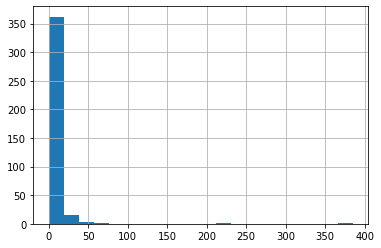

In [92]:
stud.absences.hist(bins=20)

Скорее всего есть выбросы, основное количество значений лежит в интервале от 0 до примерно 100.

In [93]:
median = stud.absences.median()
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
IQR = perc75-perc25

print(f'Медиана: {median}, 25й перцентиль: {perc25}, 75й перцентиль: {perc75}, IQR: {IQR}, границы выбросов: {perc25 - 1.5*IQR} — {perc75 + 1.5*IQR}.')

Медиана: 4.0, 25й перцентиль: 0.0, 75й перцентиль: 8.0, IQR: 8.0, границы выбросов: -12.0 — 20.0.


Отфильтруем выбросы:

In [94]:
stud = stud.loc[stud.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]

In [95]:
stud.loc[:, ['absences']].info()
stud.absences.unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


array([ 6.,  4., 10.,  2.,  0., 16., 14.,  7.,  8., 12., 18., 20.,  5.,
       13., 15.,  3.,  1., 19.,  9., 11., 17.])

Пропущенных значений больше нет

#### score

Главный столбец в исследовании.

In [96]:
display(pd.DataFrame(stud.score.value_counts()))
stud.loc[:, ['score']].info()
stud.score.unique()

,score
50.0,53
55.0,42
0.0,36
75.0,31
65.0,30
60.0,29
70.0,27
40.0,26
45.0,23
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   361 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan])

In [97]:
print(f'Числовой столбец, пропущенных значений {366-361}. Смотрим на распределение:')

Числовой столбец, пропущенных значений 5. Смотрим на распределение:


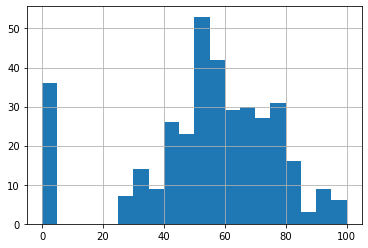

In [98]:
stud.score.hist(bins=20)

Распределение нормальное, 36 учеников набрали 0 баллов за экзамен и лишь 1 — 100 баллов. Скорее всего шкала была стобалльной, поэтому выбросы искать не будем (все значения в пределах 100). Но пропущенные значения придётся либо заменить средним, либо нулём, либо удалить.

In [99]:
display(stud.score.median())

55.0

Скорее всего безопаснее будет удалить пропуски.

In [100]:
stud = stud.dropna(subset=['score'])

### Корреляционный анализ

Корреляции рассмотрим только для числовых столбцов.

Общий взгляд:

In [102]:
stud.corr()

,studytime_granular,absences,score
studytime_granular,1.000000,0.075454,-0.113113
absences,0.075454,1.000000,0.081274
score,-0.113113,0.081274,1.000000


По всем параметрам корреляция score очень слабая.

### Анализ номинативных переменных

In [144]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=stud.loc[stud.loc[:, column].isin(stud.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

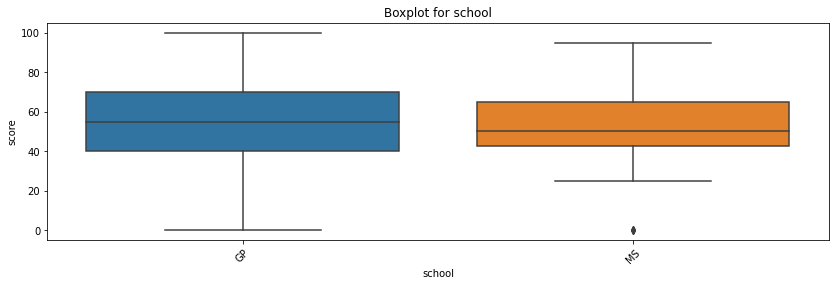

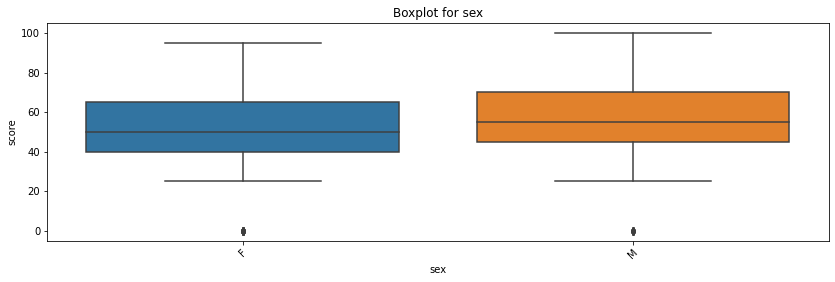

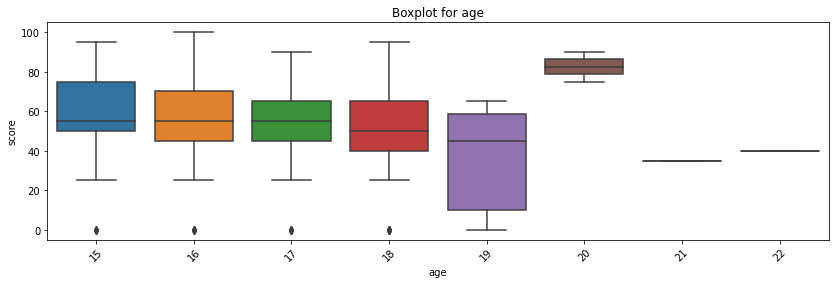

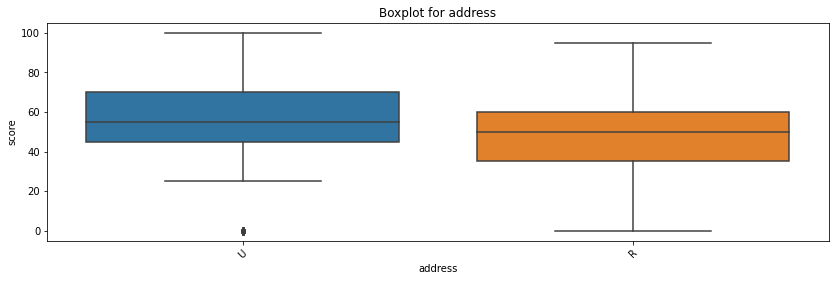

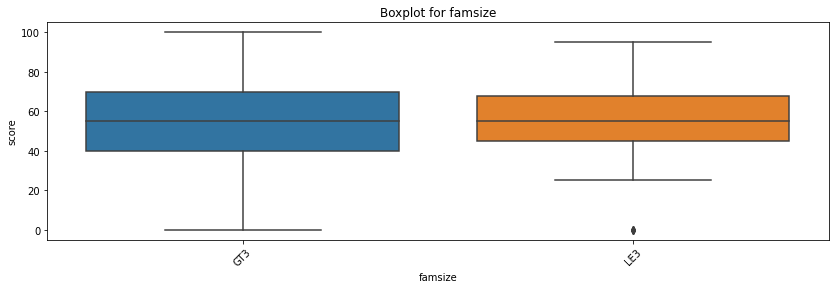

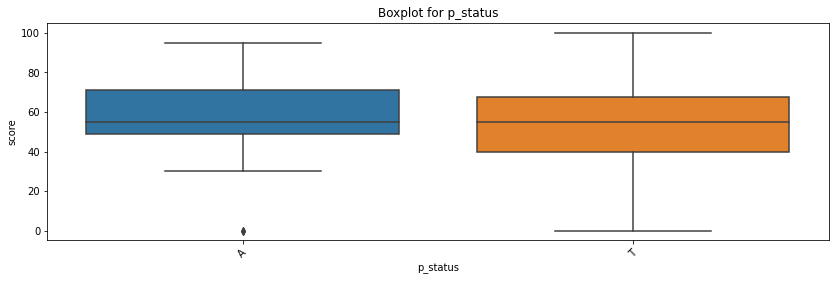

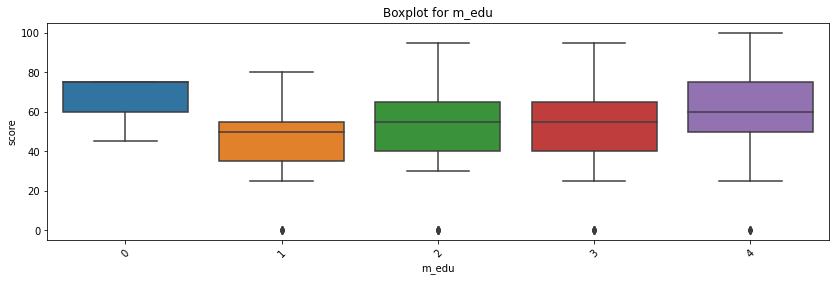

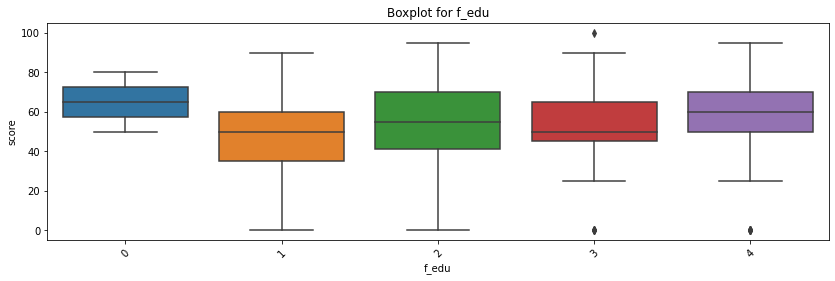

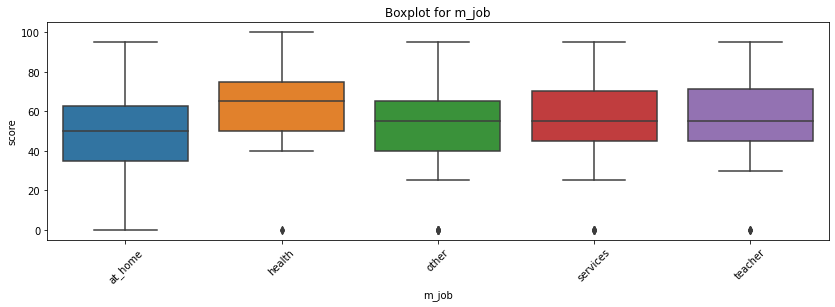

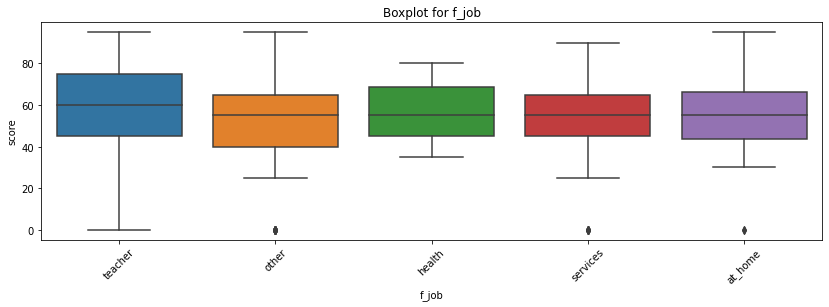

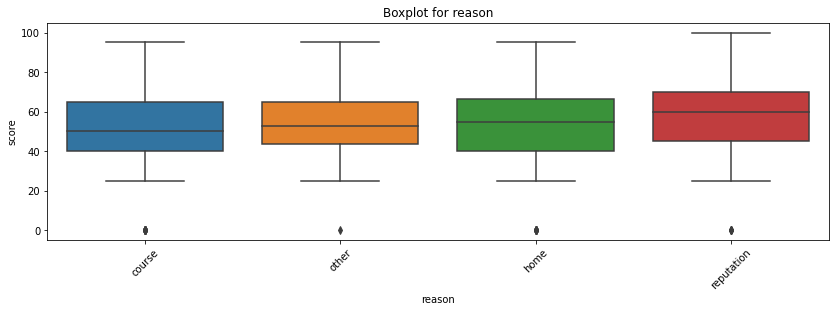

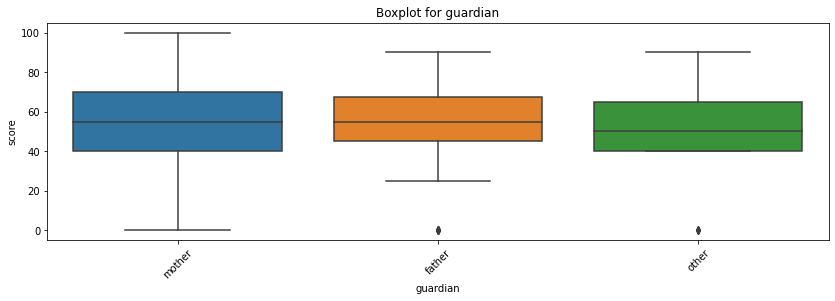

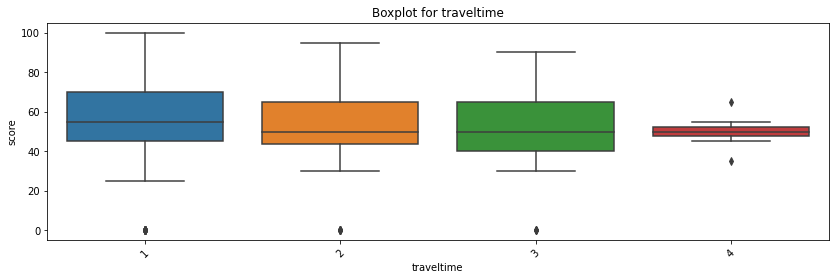

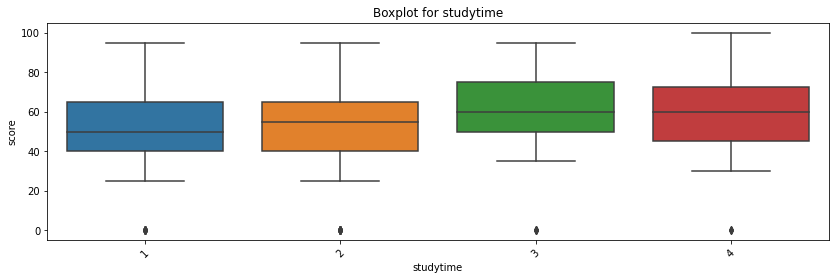

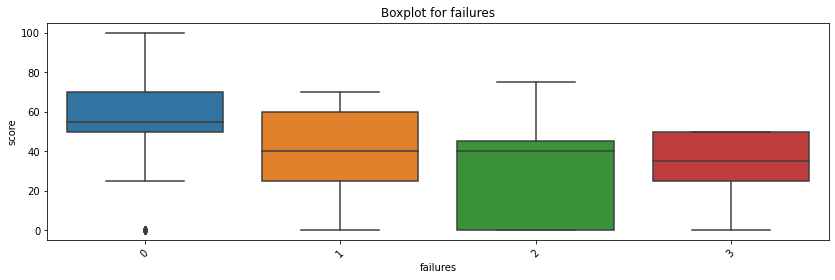

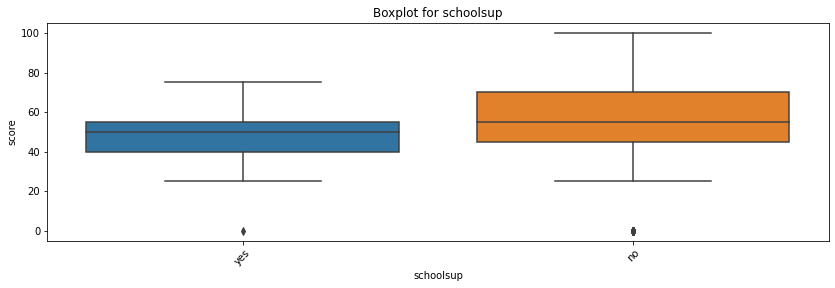

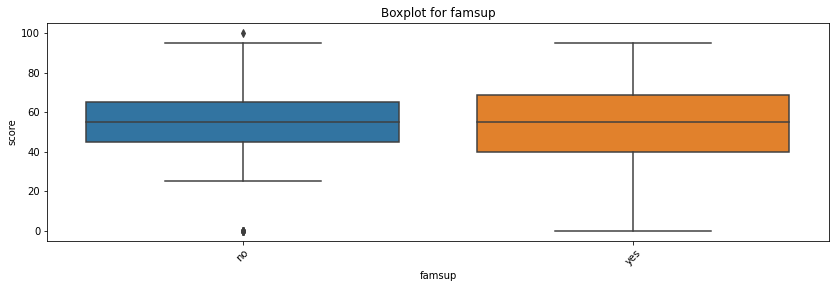

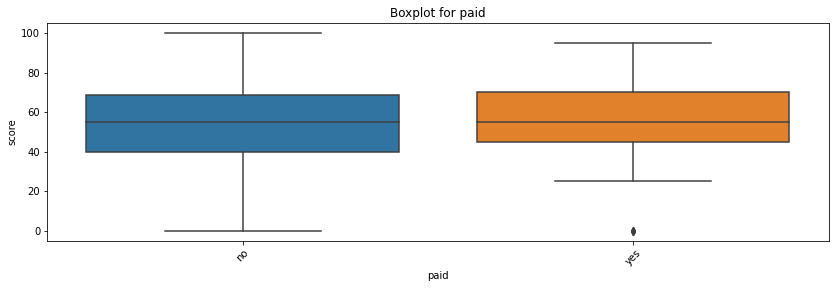

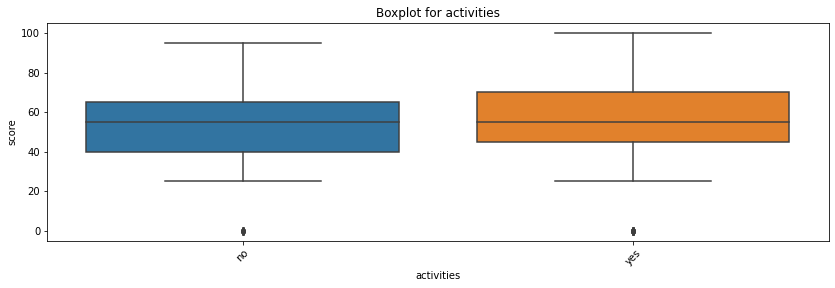

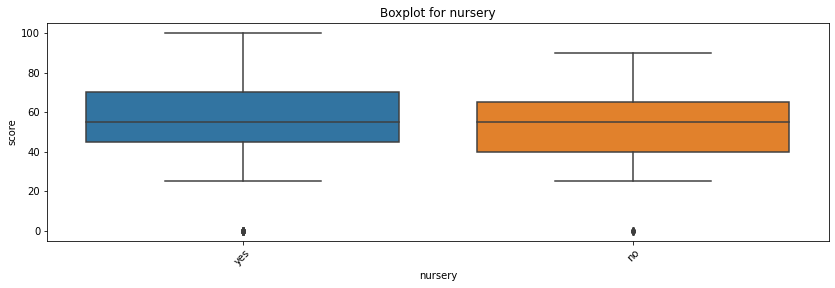

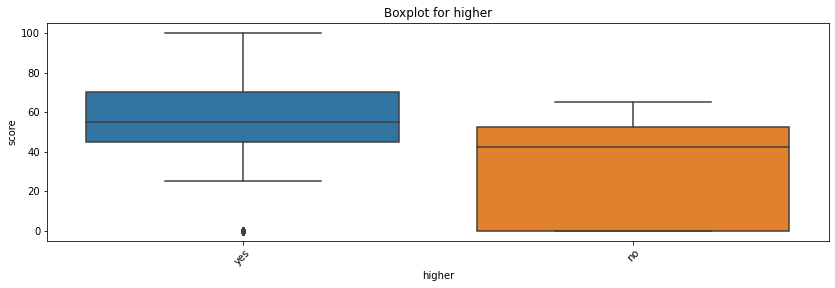

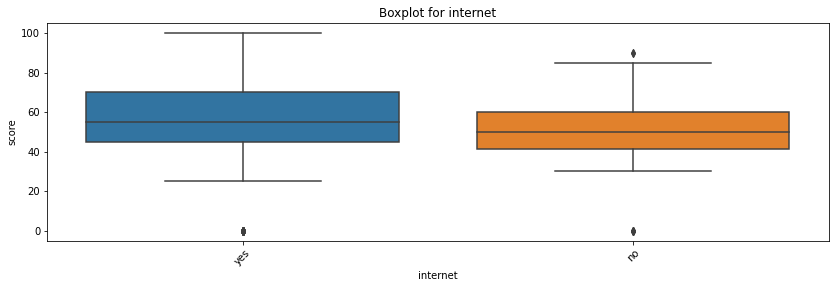

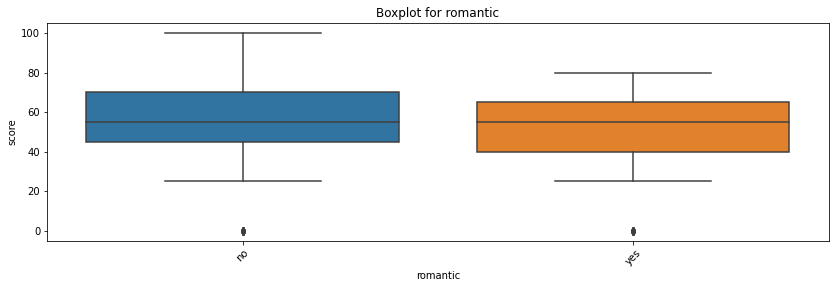

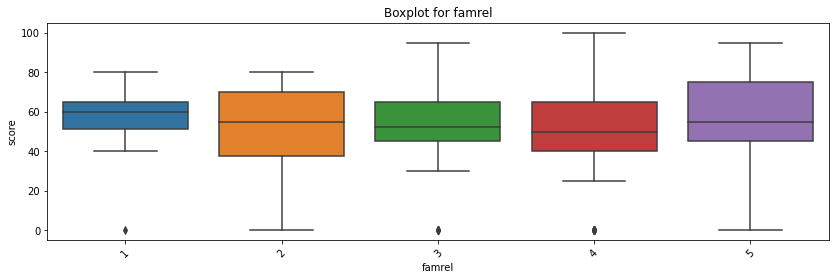

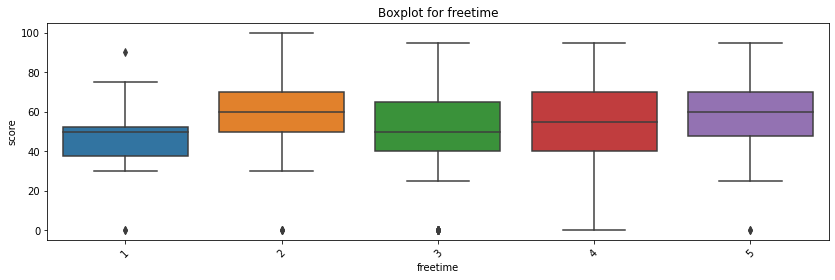

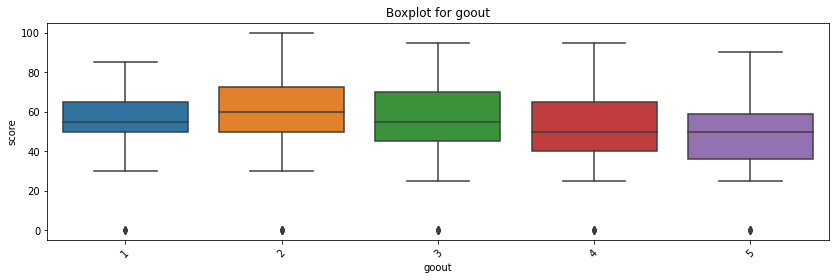

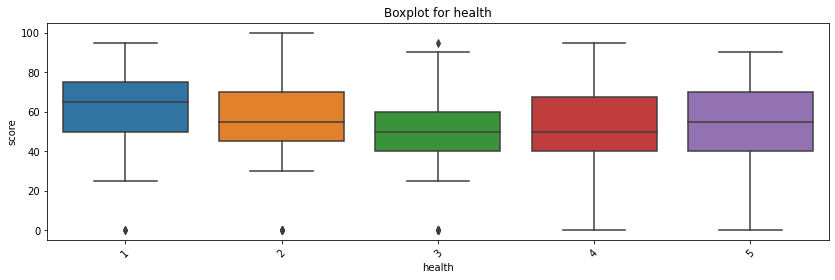

In [145]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
            'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    get_boxplot(col)

По графикам видно, что почти все параметры кроме famsize, p_status, famsup, paid, activities, nursery и romantic могут оказывать влияние на количество баллов на экзамене. Проведём тест Стьюдента, чтобы точно определить колонки, влияющие на количество баллов.

In [146]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'],
                     stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [148]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'p_status', 'm_edu', 'f_edu',
            'm_job', 'f_job', 'reason', 'guardian', 'traveltime', 'studytime',
            'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel',
            'freetime', 'goout', 'health']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки m_edu
Найдены статистически значимые различия для колонки m_job
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


Итак, для модели нам потребуются следующие столбцы: sex, address, m_job, m_edu, failures, paid, higher, romantic, и absences. Смысл столбца studytime_granular нам неизвестен, поэтому включать его в модель не будем.

In [151]:
stud_for_model = stud.loc[:, ['sex', 'address', 'm_edu', 'm_job', 'failures', 'paid', 'higher', 'romantic', 'absences']]

In [152]:
stud_for_model.head()

,sex,address,m_edu,m_job,failures,paid,higher,romantic,absences
0,F,U,4,at_home,0,no,yes,no,6.0
1,F,U,1,at_home,0,no,yes,no,4.0
2,F,U,1,at_home,3,None,yes,None,10.0
3,F,U,4,health,0,yes,yes,yes,2.0
4,F,U,3,other,0,yes,yes,no,4.0


### Выводы

- В данных достаточно мало пустых значений, столбы school, sex и age вообще не имеют пропусков.
- Выбросы были найдены только в столбце absences — данные достаточно чистые.
- Есть один столбец неизвестного назначения — studytime_granular.
- Для модели отобраны следующие столбцы: sex, address, m_job, m_edu, failures, paid, higher, romantic, и absences.